In [7]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory("Datasets/Training", 
                              batch_size=64, 
                              target_size=(200, 200), 
                              class_mode="categorical",
                              color_mode = "grayscale")

Found 5712 images belonging to 4 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Input, Dropout
model = Sequential()
model.add(Input(shape=(200,200,1)))
model.add(Conv2D(64, (5,5), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (5,5), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64, activation="LeakyReLU"))

model.add(Dropout(0.2))

model.add(Dense(64, activation="LeakyReLU"))

model.add(Dense(4, activation="softmax"))

In [13]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = [tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

In [47]:
model.fit_generator(train_generator, epochs = 2)

Epoch 1/2


C:\Users\gupta\AppData\Local\Temp\ipykernel_7500\1633912675.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs = 2)


90/90 [==============================] - 341s 4s/step - loss: 0.0335 - precision: 0.9891 - recall: 0.9886 - accuracy: 0.9886
Epoch 2/2
90/90 [==============================] - 390s 4s/step - loss: 0.0345 - precision: 0.9883 - recall: 0.9881 - accuracy: 0.9881


In [43]:
model.save("modeltrain2.keras")

In [44]:
from tensorflow.keras.models import load_model
model_1 = load_model("modeltrain2.keras")

In [45]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory("Datasets/Testing",
                                                 batch_size=64, 
                                                 target_size=(200, 200), 
                                                 class_mode="categorical",
                                                 color_mode = "grayscale")

Found 1311 images belonging to 4 classes.


In [40]:
y_pred

array([0, 1, 1, 1, 2, 1, 3, 0, 2, 3, 0, 1, 2, 2, 0, 3, 2, 1, 1, 3, 1, 3,
       2, 0, 2, 2, 1, 0, 1, 0, 3, 3, 2, 0, 1, 1, 3, 0, 2, 1, 1, 0, 1, 2,
       3, 3, 2, 3, 3, 3, 3, 1, 0, 0, 3, 1, 2, 1, 3, 3, 1, 2, 0, 2],
      dtype=int64)

In [41]:
label

array([0, 1, 1, 1, 2, 1, 3, 0, 2, 3, 0, 1, 2, 2, 1, 3, 2, 1, 1, 3, 0, 3,
       2, 1, 2, 2, 1, 0, 1, 0, 3, 3, 2, 0, 1, 1, 3, 0, 2, 3, 1, 0, 1, 2,
       3, 3, 2, 3, 3, 3, 3, 1, 0, 0, 3, 1, 2, 0, 3, 3, 1, 2, 0, 2],
      dtype=int64)

21/21 [==============================] - 11s 508ms/step - loss: 0.1676 - precision: 0.9694 - recall: 0.9672 - accuracy: 0.9680


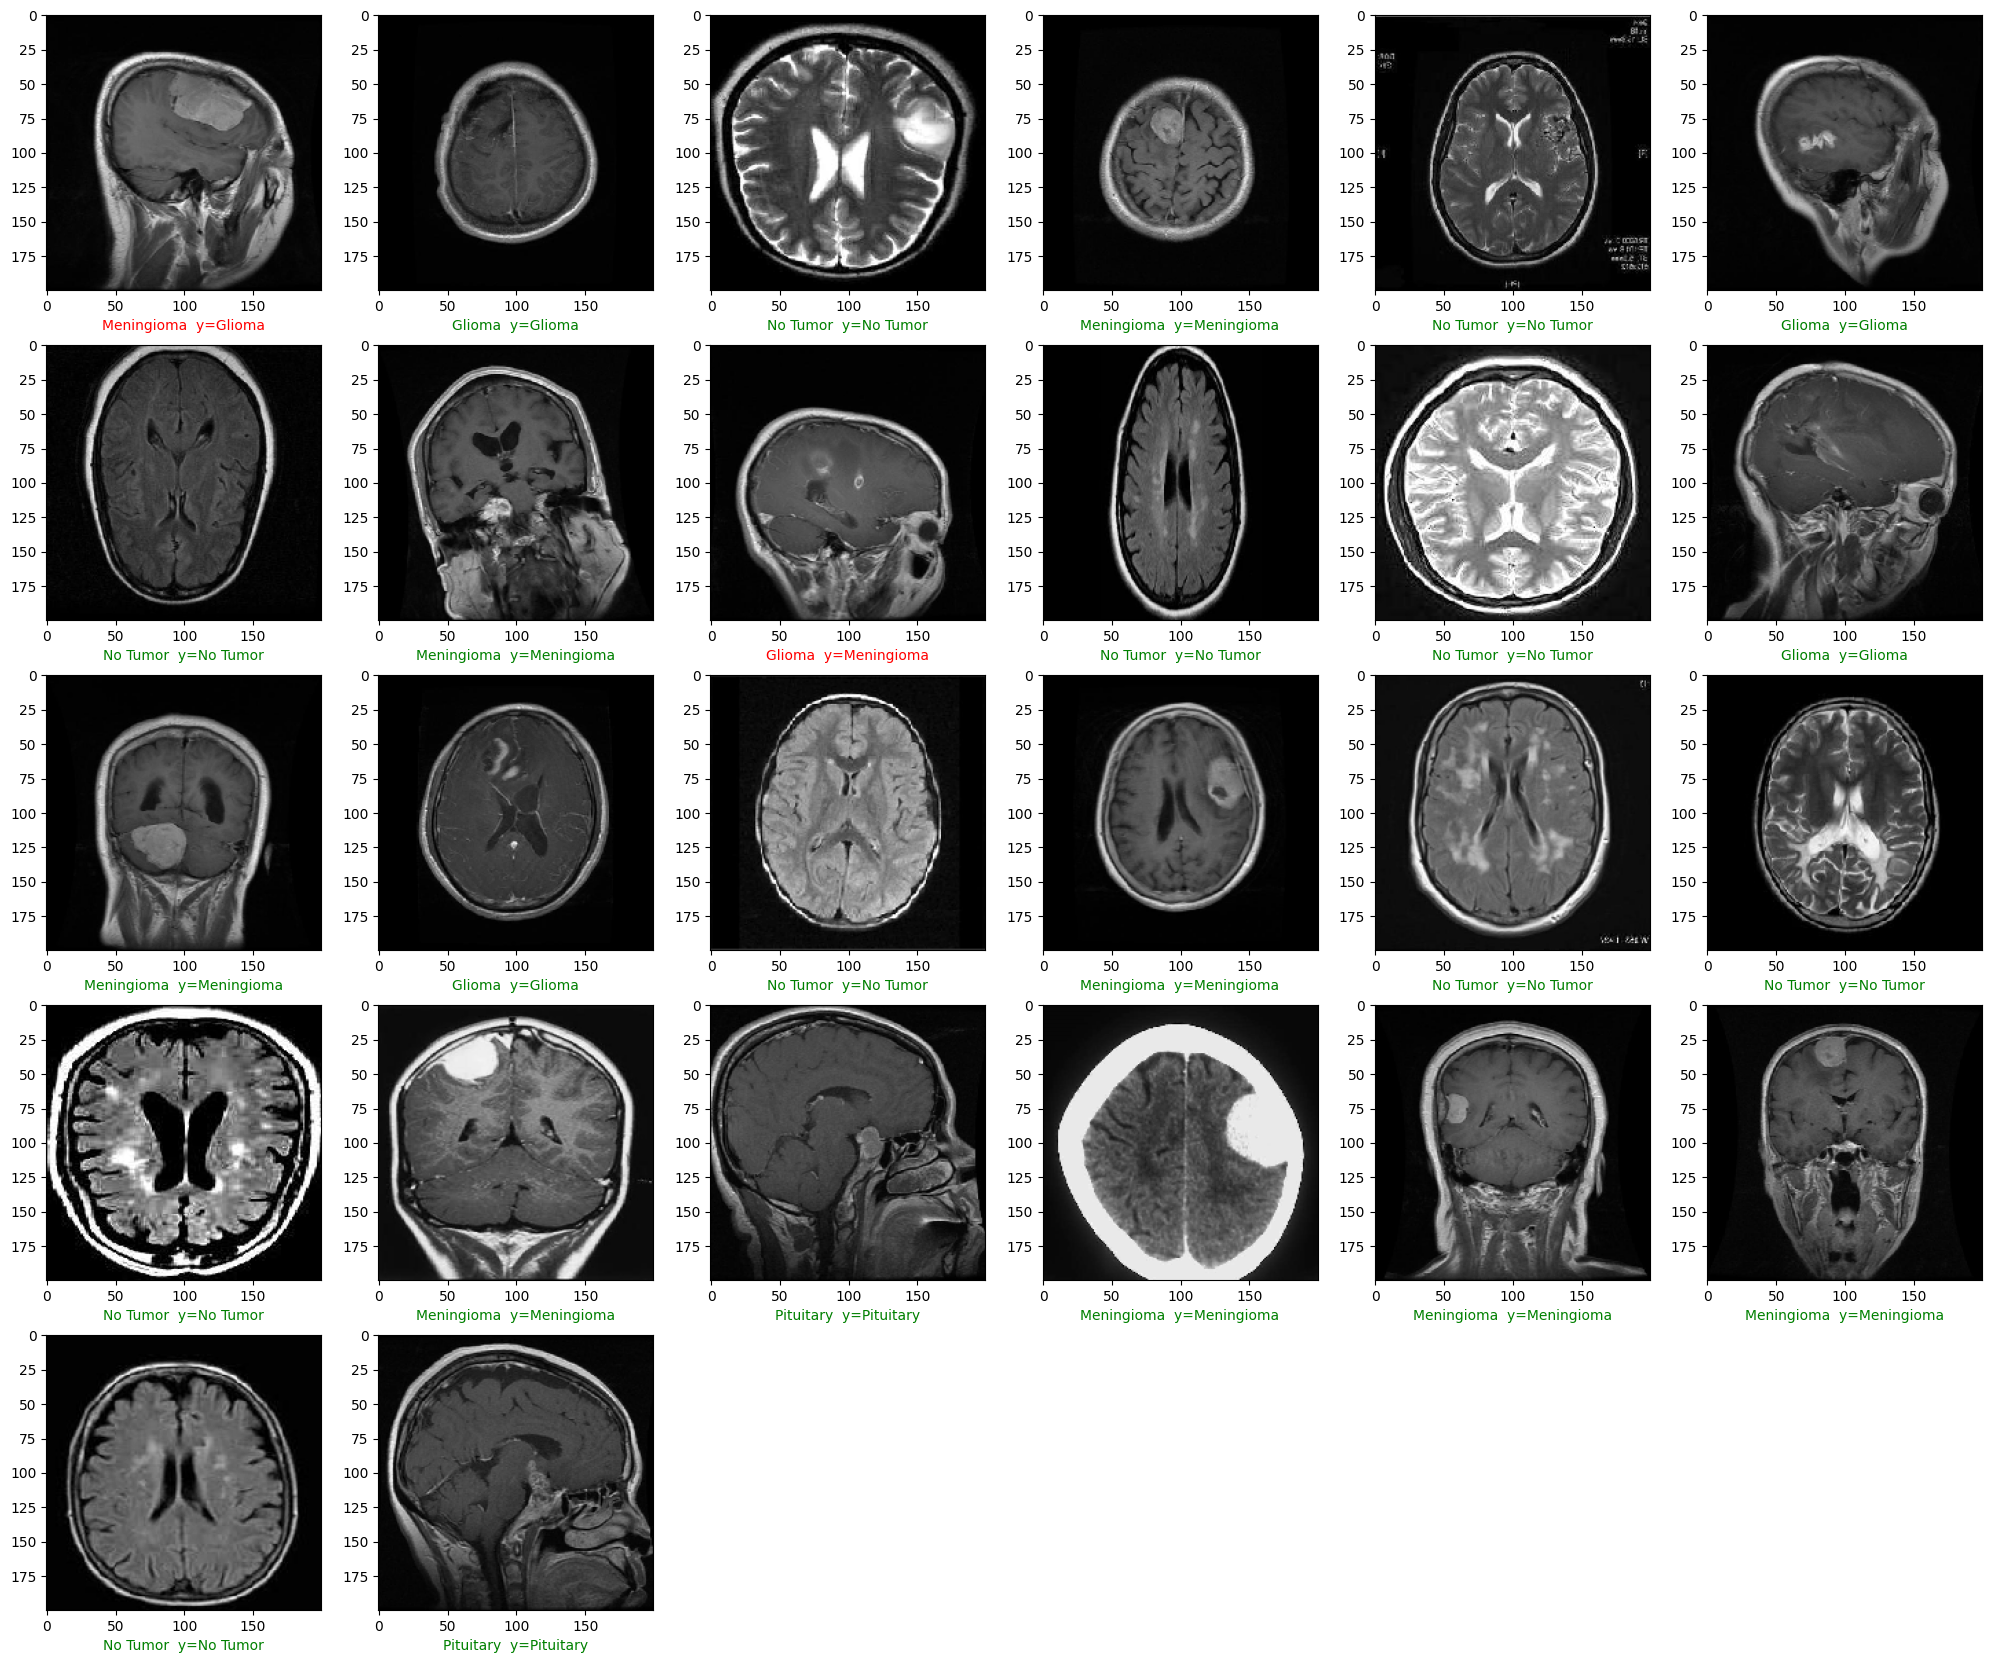

In [46]:
plt.figure(figsize=(25,25))

img, label = test_generator.next()
#label = ["glioma","meningioma","notumor","pituitary"]
y_pred = model_1.predict(img)
#print(y_pred)
y_pred = np.argmax(y_pred,axis = 1)
b = ["Glioma","Meningioma","No Tumor","Pituitary"]
label = np.argmax(label, axis=1)
#print(y_pred)
model_1.evaluate(test_generator)
#print(label)
for j in range(0,26):
    color = "green"
    plt.subplot(6,6,j+1)
    plt.imshow(img[j], cmap="gray")
    if label[j]!=y_pred[j]:
        color = "red"
    if label[j]==0.0:
        plt.xlabel(f"Glioma  y={b[y_pred[j]]}", color = color)
    elif label[j]==1.0:
        plt.xlabel(f"Meningioma  y={b[y_pred[j]]}", color = color)
    elif label[j]==2.0:
        plt.xlabel(f"No Tumor  y={b[y_pred[j]]}", color = color)
    else:
        plt.xlabel(f"Pituitary  y={b[y_pred[j]]}", color = color)
    #plt.xlabel(label[j], color = color)
plt.show()

In [ ]:
# 100    90no tumor        10 tumor
# precision = tp/(tp+fp) tp = true positive   fp = false positive
# true positive mean tumor is there and model predicted the same
# false positive is tumor wasnt there but model still gave tumor



# recall = tp/(tp+fn)  tp = true positive   fn = false negative
# true positive mean tumor is there and model predicted the same
# false negative mean tumor is there and model predicted no tumor


# accuracy = tp/all datasets tp = true predictions
# true predictions meaning all the correct predictions

In [25]:
np.sum(np.where(test_generator.classes==0))

44850

In [33]:
len(np.where(test_generator.classes==0)[0])

300